In [1]:
import nltk
nltk.download('popular')
import demoji


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/shireesh/nltk_data...
[nltk_data]    |   Package movie_review

In [40]:
# Read the text file
with open('input.txt', 'r') as file:
    text = file.read()

In [41]:
# replacing emojis with description
text = demoji.replace_with_desc(text)

In [42]:
#Removing smart quotes
text = text.replace(""", "\"").replace(""","\"")

In [43]:
from nltk.tokenize import word_tokenize
# Tokenize the text
tokens = word_tokenize(text)

In [44]:
#lower casing
tokens = [token.lower() for token in tokens]

In [45]:
# this is how stemming is done. but will be ignoring in favor of lemmitization as its more accurate
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_and_stemmed = [stemmer.stem(token) for token in tokens]

In [46]:
nltk.download("wordnet")
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import defaultdict

tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['V'] = wordnet.VERB
tag_map['A'] = wordnet.ADJ
tag_map['R'] = wordnet.ADJ

lemmitizer = WordNetLemmatizer()
lemmitized_result = ""
for token, tag in pos_tag(tokens):
    lemma = lemmitizer.lemmatize(token, tag_map[tag[0]])
    lemmitized_result = lemmitized_result + " " + lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shireesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
from nltk.corpus import stopwords
import spacy

nltk.download("stopwords")
nltk_stopwords = stopwords.words('english')

nlp = spacy.load("en_core_web_sm")
spacy_stopwords = nlp.Defaults.stop_words

#removing stop words in tokens
lemitized_tokens = word_tokenize(lemmitized_result)
lemitized_tokens = [token for token in lemitized_tokens if token not in spacy_stopwords and token not in nltk_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shireesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
#removing punctuations
tokens = [token for token in lemitized_tokens if token.isalnum()]

In [50]:
from spellchecker import SpellChecker
spell_checker = SpellChecker()
unknowns = set(spell_checker.unknown(tokens))
result = []
for token in tokens:
    if token in unknowns and spell_checker.correction(token) is not None:
        result.append(spell_checker.correction(token))
    else:
        result.append(token)
tokens = result


In [51]:
result = " ".join(tokens)
with open('week5_1.txt', 'w') as file:
    file.write(f'{result}')

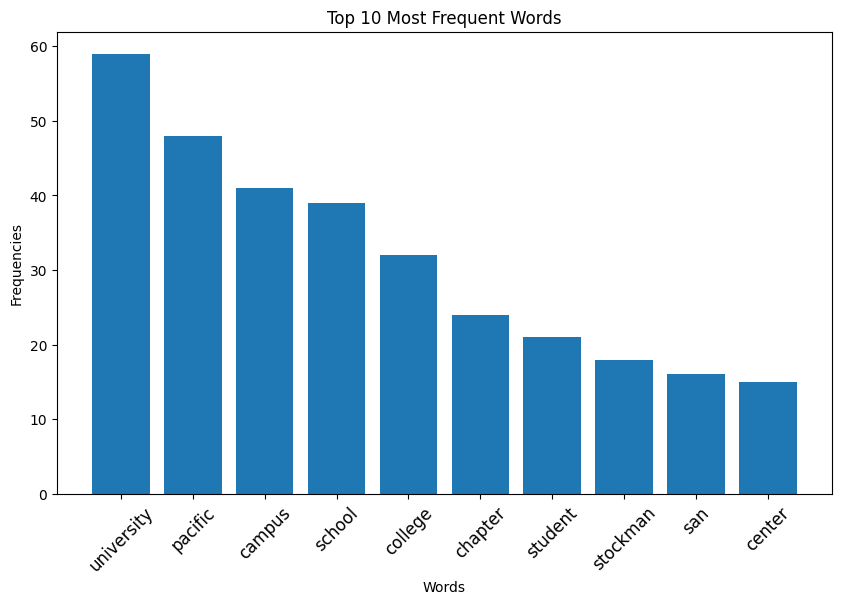

In [52]:
#Displaying the most frequent 10 words and save the result as an image file.
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import matplotlib.pyplot as plt

# Read the text file
with open('week5_1.txt', 'r') as file:
    text = file.read()

# Tokenize the text
tokens = word_tokenize(text)

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Get the 10 most frequent words
most_common_words = freq_dist.most_common(10)

# Extract words and their frequencies
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45, fontsize=12)

# Save the chart as an image file
plt.savefig('week_5_word_frequencies.png', bbox_inches='tight')

# Show the chart (optional)
plt.show()


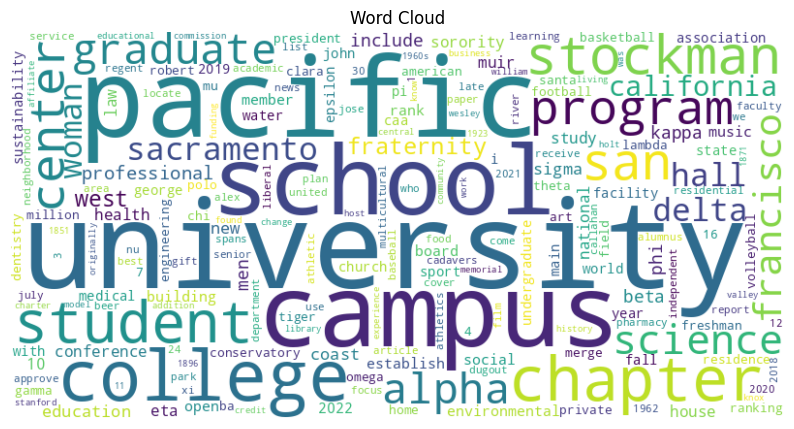

In [53]:
# Compute a word cloud from the word frequency distribution and save the result as an image file.

import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the text file
with open('week5_1.txt', 'r') as file:
    text = file.read()

# Tokenize the text
tokens = word_tokenize(text)

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Generate a word cloud from the frequency distribution
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Create a figure for the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')

# Save the word cloud as an image file
wordcloud.to_file('week5_word_cloud.png')

# Show the word cloud (optional)
plt.show()


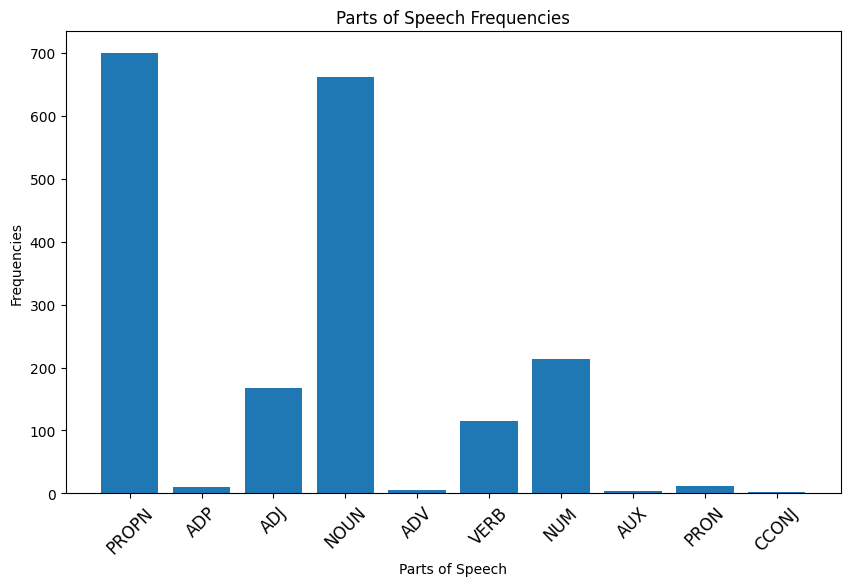

In [54]:
# Display the frequencies of the parts of speech and save the result as an image file.
import spacy
import matplotlib.pyplot as plt

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Read the text file
with open('week5_1.txt', 'r') as file:
    text = file.read()

# Process the text with spaCy to perform POS tagging
doc = nlp(text)

# Count POS frequencies
pos_freq = {}
for token in doc:
    pos = token.pos_
    if pos in pos_freq:
        pos_freq[pos] += 1
    else:
        pos_freq[pos] = 1

# Extract POS labels and frequencies
pos_labels, frequencies = zip(*pos_freq.items())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(pos_labels, frequencies)
plt.xlabel('Parts of Speech')
plt.ylabel('Frequencies')
plt.title('Parts of Speech Frequencies')
plt.xticks(rotation=45, fontsize=12)

# Save the chart as an image file
plt.savefig('week5_pos_frequencies.png', bbox_inches='tight')

# Show the chart (optional)
plt.show()
